# Fire Data Preprocessing

In [67]:
import sys
from pathlib import Path

sys.path.append(str(Path.cwd().parent.parent))

from config import raw_files, processed_files

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Loading the Data

In [69]:
filepath = processed_files["fire"]
df = pd.read_csv(filepath, parse_dates=['acq_date_acq_time'])
df.reset_index(drop=True)
df.head()

,acq_date_acq_time,latitude,longitude,bright_ti4,scan,track,satellite,instrument,confidence,version,bright_ti5,frp,daynight,type,country
0,2024-01-01 00:03:00,27.72818,9.87200,295.51,0.76,0.77,N20,VIIRS,n,2,277.66,1.24,N,2,DZ
1,2024-01-01 00:03:00,28.63288,9.77909,301.80,0.79,0.78,N20,VIIRS,n,2,277.05,1.57,N,2,DZ
2,2024-01-01 00:03:00,28.64012,9.77953,298.65,0.79,0.78,N20,VIIRS,n,2,277.04,1.34,N,2,DZ
3,2024-01-01 01:41:00,36.74886,6.25409,338.04,0.46,0.39,N20,VIIRS,n,2,257.28,5.21,N,2,DZ
4,2024-01-01 01:41:00,35.87978,4.44782,309.49,0.41,0.37,N20,VIIRS,n,2,272.08,1.58,N,2,DZ


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90250 entries, 0 to 90249
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   acq_date_acq_time  90250 non-null  datetime64[ns]
 1   latitude           90250 non-null  float64       
 2   longitude          90250 non-null  float64       
 3   bright_ti4         90250 non-null  float64       
 4   scan               90250 non-null  float64       
 5   track              90250 non-null  float64       
 6   satellite          90250 non-null  object        
 7   instrument         90250 non-null  object        
 8   confidence         90250 non-null  object        
 9   version            90250 non-null  int64         
 10  bright_ti5         90250 non-null  float64       
 11  frp                90250 non-null  float64       
 12  daynight           90250 non-null  object        
 13  type               90250 non-null  int64         
 14  countr

## No missing values

## Removing Global Variables

In [71]:
df.nunique()

acq_date_acq_time     3873
latitude             54957
longitude            56922
bright_ti4            6189
scan                    49
track                   43
satellite                1
instrument               1
confidence               3
version                  1
bright_ti5            6180
frp                   2565
daynight                 2
type                     3
country                  2
dtype: int64

In [72]:
df.drop(['satellite', 'version', "instrument"], axis=1, inplace=True)

In [73]:
df.head()

,acq_date_acq_time,latitude,longitude,bright_ti4,scan,track,confidence,bright_ti5,frp,daynight,type,country
0,2024-01-01 00:03:00,27.72818,9.87200,295.51,0.76,0.77,n,277.66,1.24,N,2,DZ
1,2024-01-01 00:03:00,28.63288,9.77909,301.80,0.79,0.78,n,277.05,1.57,N,2,DZ
2,2024-01-01 00:03:00,28.64012,9.77953,298.65,0.79,0.78,n,277.04,1.34,N,2,DZ
3,2024-01-01 01:41:00,36.74886,6.25409,338.04,0.46,0.39,n,257.28,5.21,N,2,DZ
4,2024-01-01 01:41:00,35.87978,4.44782,309.49,0.41,0.37,n,272.08,1.58,N,2,DZ


In [124]:
df.drop(['country'], axis=1, inplace=True)
df.head()

,acq_date_acq_time,latitude,longitude,bright_ti4,track,confidence,bright_ti5,log_scan,log_frp,day
5,2024-01-01 01:41:00,35.70751,5.53337,312.32,0.39,1,268.88,0.371564,0.810930,0
13,2024-01-01 01:42:00,32.13579,6.46961,326.80,0.43,1,279.44,0.444686,1.874874,0
20,2024-01-01 01:42:00,32.35563,6.97630,341.76,0.44,1,280.66,0.329304,2.420368,0
64,2024-01-01 01:43:00,28.19791,9.39581,327.82,0.55,1,277.00,0.285179,0.891998,0
67,2024-01-01 01:43:00,28.12826,9.49323,308.57,0.55,1,278.63,0.285179,0.615186,0


## Filtering by Fire Type (keeping presumed vegetation fires (0))

In [74]:
df = df[df['type'] == 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14216 entries, 5 to 90239
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   acq_date_acq_time  14216 non-null  datetime64[ns]
 1   latitude           14216 non-null  float64       
 2   longitude          14216 non-null  float64       
 3   bright_ti4         14216 non-null  float64       
 4   scan               14216 non-null  float64       
 5   track              14216 non-null  float64       
 6   confidence         14216 non-null  object        
 7   bright_ti5         14216 non-null  float64       
 8   frp                14216 non-null  float64       
 9   daynight           14216 non-null  object        
 10  type               14216 non-null  int64         
 11  country            14216 non-null  object        
dtypes: datetime64[ns](1), float64(7), int64(1), object(3)
memory usage: 1.4+ MB


We can safely drop the type attribute, since it is no longer variable.

In [75]:
df.drop(['type'], axis=1, inplace=True)
df.head()

,acq_date_acq_time,latitude,longitude,bright_ti4,scan,track,confidence,bright_ti5,frp,daynight,country
5,2024-01-01 01:41:00,35.70751,5.53337,312.32,0.45,0.39,n,268.88,1.25,N,DZ
13,2024-01-01 01:42:00,32.13579,6.46961,326.80,0.56,0.43,n,279.44,5.52,N,DZ
20,2024-01-01 01:42:00,32.35563,6.97630,341.76,0.39,0.44,n,280.66,10.25,N,DZ
64,2024-01-01 01:43:00,28.19791,9.39581,327.82,0.33,0.55,n,277.00,1.44,N,DZ
67,2024-01-01 01:43:00,28.12826,9.49323,308.57,0.33,0.55,n,278.63,0.85,N,DZ


**sometimes a single fire appears several times in the fire dataset (several nearby locations at the same timestamp). Do we keep all of them? or should we merge them into 1?**

## bright_ti4

<Axes: xlabel='bright_ti4', ylabel='Count'>

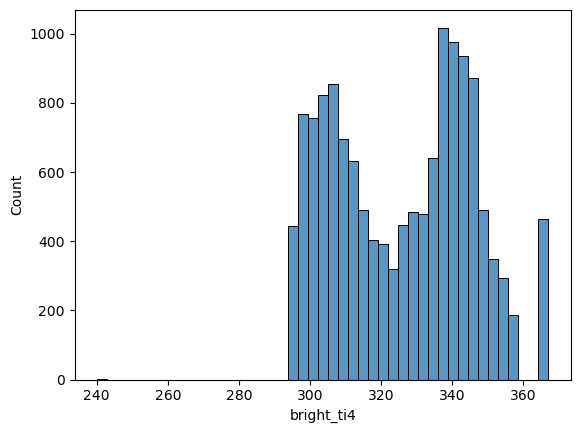

In [76]:
sns.histplot(df, x='bright_ti4')

<Axes: xlabel='bright_ti4'>

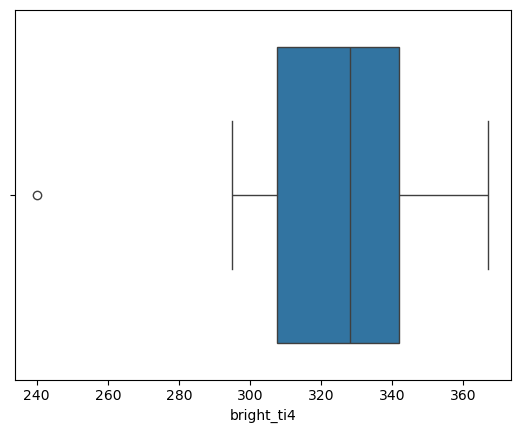

In [77]:
sns.boxplot(df, x='bright_ti4')

one outlier: must be spurious.

## bright_ti4

<Axes: xlabel='bright_ti4', ylabel='Count'>

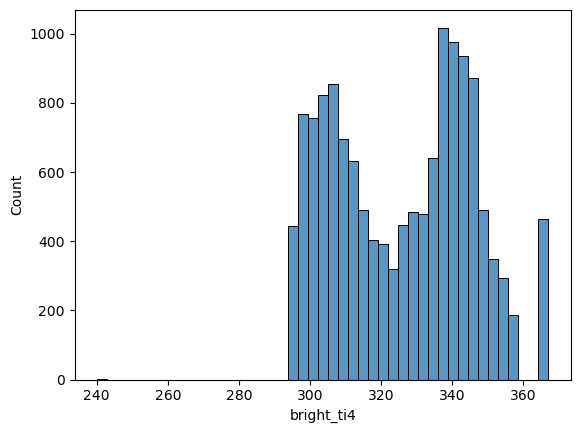

In [78]:
sns.histplot(df, x='bright_ti4')

<Axes: xlabel='bright_ti4'>

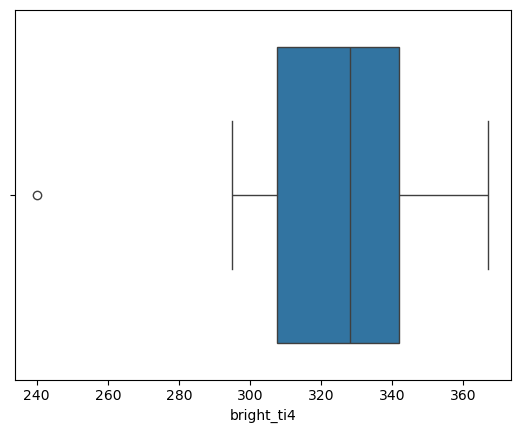

In [79]:
sns.boxplot(df, x='bright_ti4')

one outlier: must be spurious.

In [80]:
def drop_outliers_iqr(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)

    iqr = q3 - q1

    upper = q3 + 1.5 * iqr
    lower = q1 - 1.5 * iqr
    df = df[(df[column] < upper) & (df[column] > lower)]

    return df

In [81]:
df = drop_outliers_iqr(df, "bright_ti4")

<Axes: xlabel='bright_ti4'>

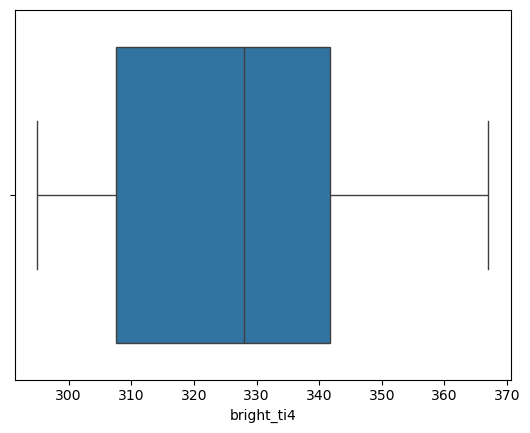

In [82]:
sns.boxplot(df, x='bright_ti4')

<Axes: xlabel='bright_ti4', ylabel='Count'>

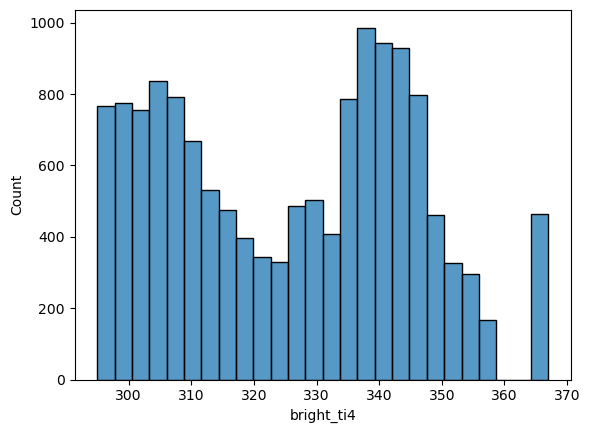

In [83]:
sns.histplot(df, x='bright_ti4')

In [84]:
def drop_outliers_iqr(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)

    iqr = q3 - q1

    upper = q3 + 1.5 * iqr
    lower = q1 - 1.5 * iqr
    df = df[(df[column] < upper) & (df[column] > lower)]

    return df

In [85]:
df = drop_outliers_iqr(df, "bright_ti4")

<Axes: xlabel='bright_ti4'>

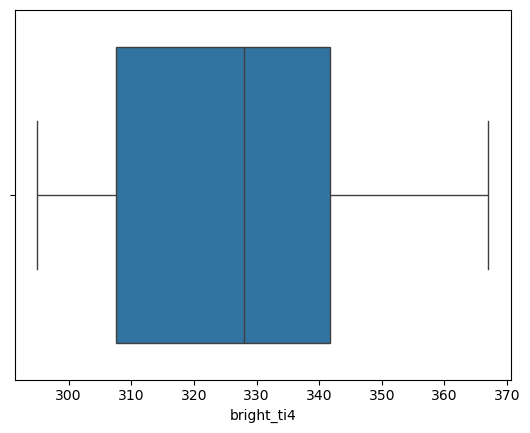

In [86]:
sns.boxplot(df, x='bright_ti4')

<Axes: xlabel='bright_ti4', ylabel='Count'>

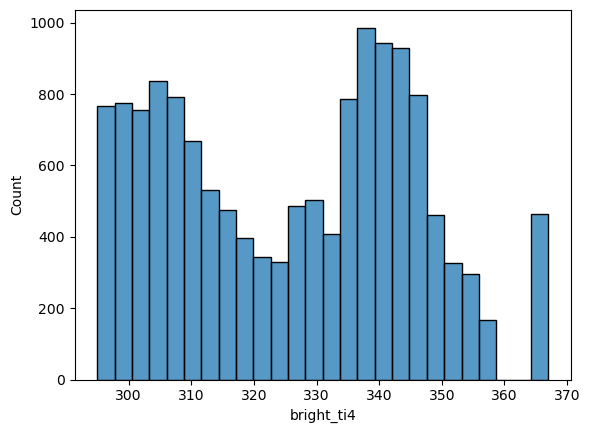

In [87]:
sns.histplot(df, x='bright_ti4')

## bright_ti5

<Axes: xlabel='bright_ti5', ylabel='Count'>

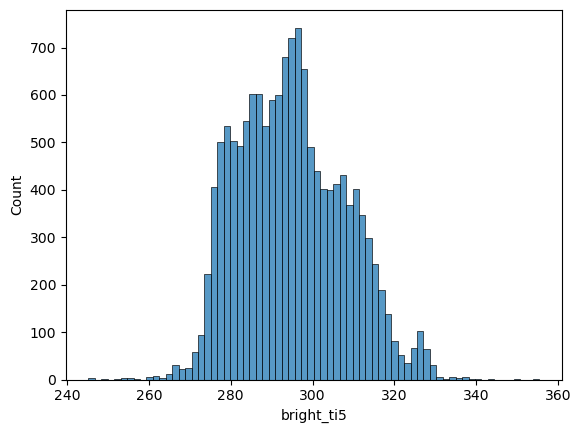

In [88]:
sns.histplot(df, x='bright_ti5')

<Axes: xlabel='bright_ti5'>

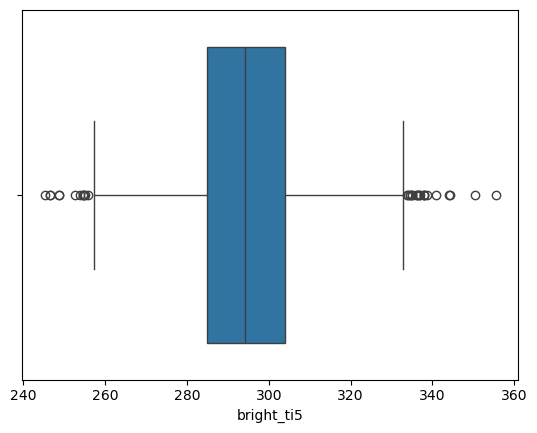

In [89]:
sns.boxplot(df, x='bright_ti5')

In [90]:
temp_df = drop_outliers_iqr(df, 'bright_ti5')
nb_outliers = df.shape[0] - temp_df.shape[0]
per_outliers = nb_outliers / df.shape[0]
print(f'Percentage of outliers: {per_outliers*100:.2f}%')

Percentage of outliers: 0.23%


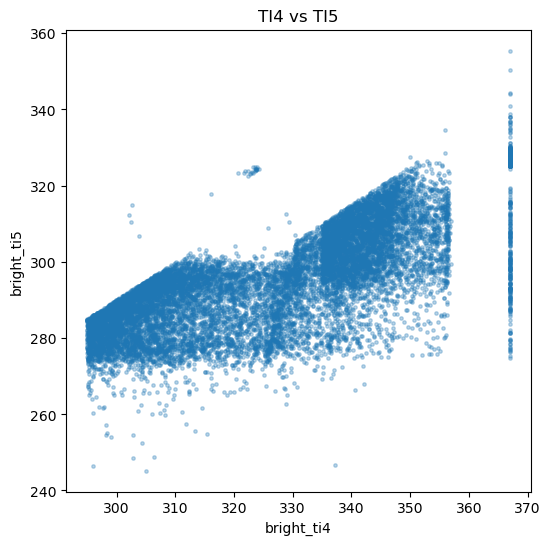

In [91]:
plt.figure(figsize=(6,6))
plt.scatter(df['bright_ti4'], df['bright_ti5'], s=6, alpha=0.3)
plt.xlabel('bright_ti4'); plt.ylabel('bright_ti5')
plt.title('TI4 vs TI5')
plt.xscale('linear'); plt.yscale('linear')
plt.show()

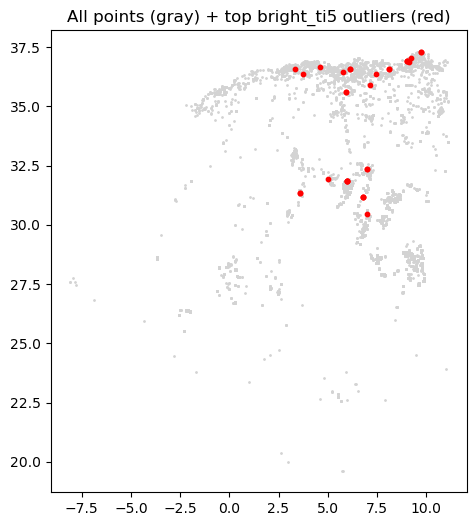

In [92]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Create GeoDataFrame with geometry column
gdf = gpd.GeoDataFrame(
    df,
    geometry=[Point(xy) for xy in zip(df.longitude, df.latitude)],
    crs="EPSG:4326"
)

# Identify outliers: values NOT in temp_df['bright_ti5']
outliers = gdf[~gdf['bright_ti5'].isin(temp_df['bright_ti5'])]

# Plot
ax = gdf.plot(markersize=1, color='lightgray', figsize=(8, 6))
outliers.plot(ax=ax, color='red', markersize=10)
plt.title('All points (gray) + top bright_ti5 outliers (red)')
plt.show()


## Scan

<Axes: xlabel='scan', ylabel='Count'>

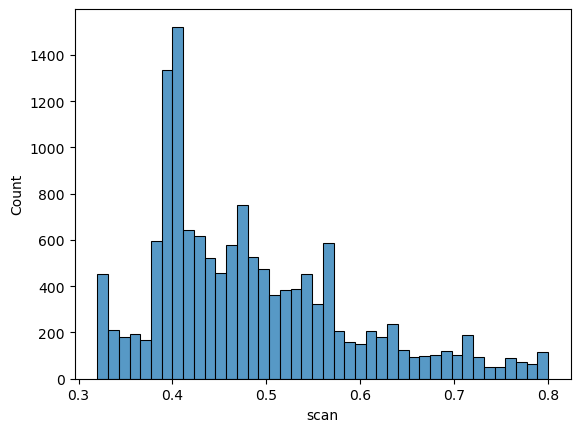

In [93]:
sns.histplot(df, x='scan')

<Axes: xlabel='scan'>

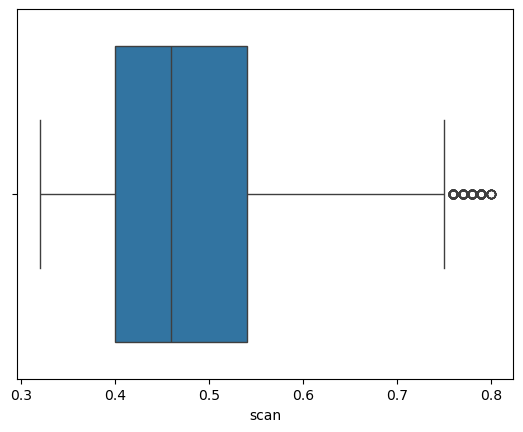

In [94]:
sns.boxplot(df, x='scan')

In [95]:
temp_df = drop_outliers_iqr(df, 'scan')
nb_outliers = df.shape[0] - temp_df.shape[0]
per_outliers = nb_outliers / df.shape[0]
print(f'Percentage of outliers: {per_outliers*100:.2f}%')

Percentage of outliers: 2.74%


Right skewed and has outliers => apply log transformation

<Axes: xlabel='log_scan', ylabel='Count'>

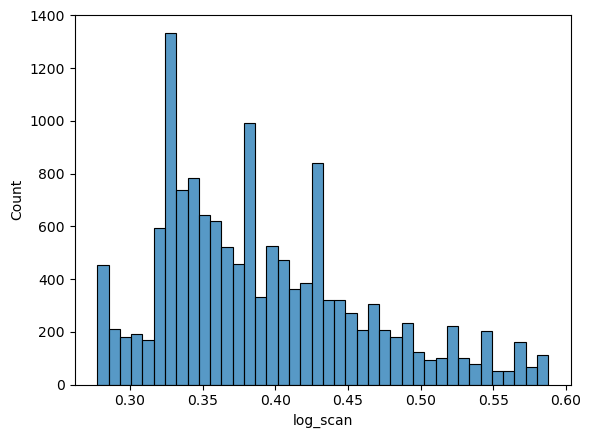

In [96]:
df['log_scan'] = np.log1p(df['scan'])

sns.histplot(df, x='log_scan')

In [123]:
df.drop(['scan'], axis=1, inplace=True)
df.head()

,acq_date_acq_time,latitude,longitude,bright_ti4,track,confidence,bright_ti5,country,log_scan,log_frp,day
5,2024-01-01 01:41:00,35.70751,5.53337,312.32,0.39,1,268.88,DZ,0.371564,0.810930,0
13,2024-01-01 01:42:00,32.13579,6.46961,326.80,0.43,1,279.44,DZ,0.444686,1.874874,0
20,2024-01-01 01:42:00,32.35563,6.97630,341.76,0.44,1,280.66,DZ,0.329304,2.420368,0
64,2024-01-01 01:43:00,28.19791,9.39581,327.82,0.55,1,277.00,DZ,0.285179,0.891998,0
67,2024-01-01 01:43:00,28.12826,9.49323,308.57,0.55,1,278.63,DZ,0.285179,0.615186,0


## Track : No Outliers

<Axes: xlabel='track', ylabel='Count'>

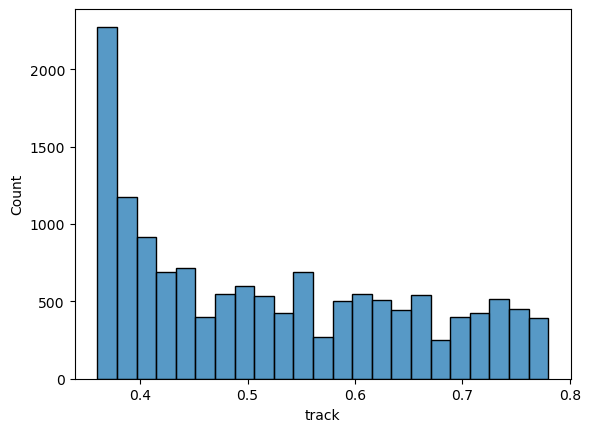

In [97]:
sns.histplot(df, x='track')

<Axes: xlabel='track'>

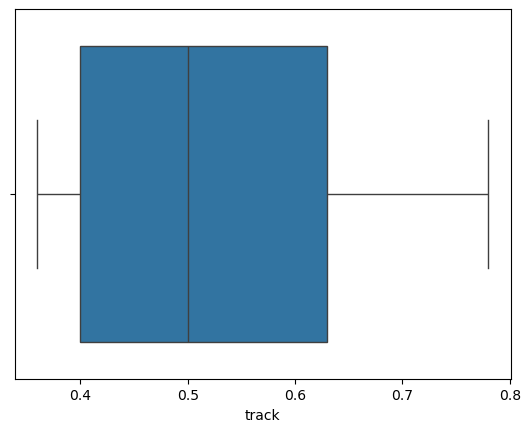

In [98]:
sns.boxplot(df, x='track')

## FRP

<Axes: xlabel='frp', ylabel='Count'>

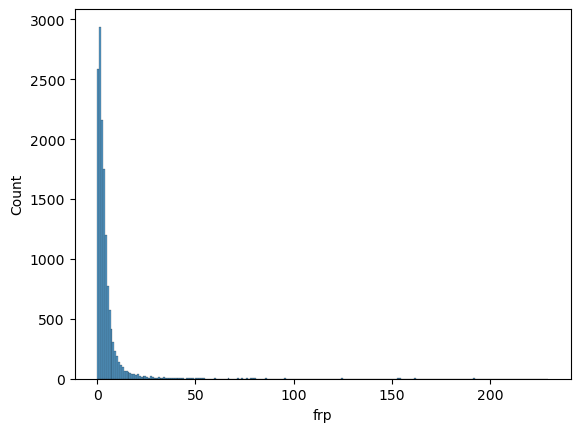

In [99]:
sns.histplot(df, x='frp')

<Axes: xlabel='frp'>

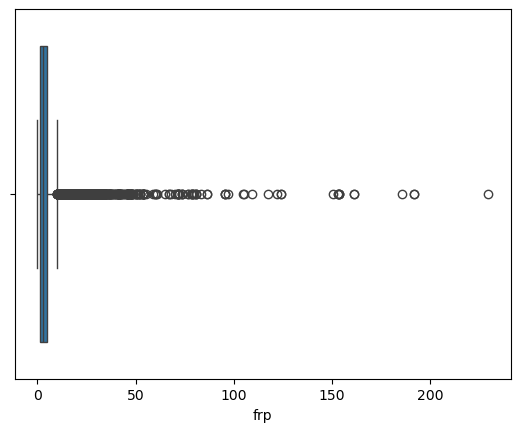

In [100]:
sns.boxplot(df, x='frp')

In [101]:
temp_df = drop_outliers_iqr(df, 'frp')
nb_outliers = df.shape[0] - temp_df.shape[0]
per_outliers = nb_outliers / df.shape[0]
print(f'Percentage of outliers: {per_outliers*100:.2f}%')

Percentage of outliers: 8.10%


Right skewed and has outliers => apply log transformation

<Axes: xlabel='log_frp', ylabel='Count'>

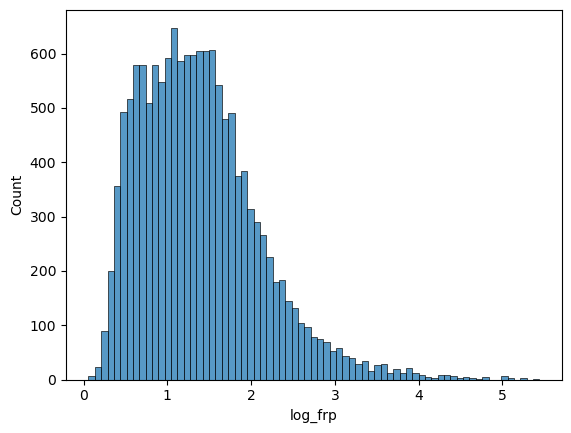

In [102]:
df['log_frp'] = np.log1p(df['frp'])

sns.histplot(df, x='log_frp')

In [122]:
df.drop(['frp'], axis=1, inplace=True)
df.head()

,acq_date_acq_time,latitude,longitude,bright_ti4,scan,track,confidence,bright_ti5,country,log_scan,log_frp,day
5,2024-01-01 01:41:00,35.70751,5.53337,312.32,0.45,0.39,1,268.88,DZ,0.371564,0.810930,0
13,2024-01-01 01:42:00,32.13579,6.46961,326.80,0.56,0.43,1,279.44,DZ,0.444686,1.874874,0
20,2024-01-01 01:42:00,32.35563,6.97630,341.76,0.39,0.44,1,280.66,DZ,0.329304,2.420368,0
64,2024-01-01 01:43:00,28.19791,9.39581,327.82,0.33,0.55,1,277.00,DZ,0.285179,0.891998,0
67,2024-01-01 01:43:00,28.12826,9.49323,308.57,0.33,0.55,1,278.63,DZ,0.285179,0.615186,0


## Encoding categorical features

In [120]:
df['day'] = np.where(df['daynight'] == 'D', True, False).astype(int)
df.drop(['daynight'], axis=1, inplace=True)

In [121]:
df.head()

,acq_date_acq_time,latitude,longitude,bright_ti4,scan,track,confidence,bright_ti5,frp,country,log_scan,log_frp,day
5,2024-01-01 01:41:00,35.70751,5.53337,312.32,0.45,0.39,1,268.88,1.25,DZ,0.371564,0.810930,0
13,2024-01-01 01:42:00,32.13579,6.46961,326.80,0.56,0.43,1,279.44,5.52,DZ,0.444686,1.874874,0
20,2024-01-01 01:42:00,32.35563,6.97630,341.76,0.39,0.44,1,280.66,10.25,DZ,0.329304,2.420368,0
64,2024-01-01 01:43:00,28.19791,9.39581,327.82,0.33,0.55,1,277.00,1.44,DZ,0.285179,0.891998,0
67,2024-01-01 01:43:00,28.12826,9.49323,308.57,0.33,0.55,1,278.63,0.85,DZ,0.285179,0.615186,0


Options:
- drop low confidence instances
- encode as ordinal values

In [105]:
df['confidence'].value_counts(normalize=True)

confidence
n    0.889342
l    0.090820
h    0.019838
Name: proportion, dtype: float64

In [117]:
mapping = {
    'l': 0,
    'n': 1,
    'h': 2
}

df['confidence'] = df['confidence'].apply(lambda x : mapping[x])

In [118]:
df.head()

,acq_date_acq_time,latitude,longitude,bright_ti4,scan,track,confidence,bright_ti5,frp,daynight,country,log_scan,log_frp,day
5,2024-01-01 01:41:00,35.70751,5.53337,312.32,0.45,0.39,1,268.88,1.25,N,DZ,0.371564,0.810930,0
13,2024-01-01 01:42:00,32.13579,6.46961,326.80,0.56,0.43,1,279.44,5.52,N,DZ,0.444686,1.874874,0
20,2024-01-01 01:42:00,32.35563,6.97630,341.76,0.39,0.44,1,280.66,10.25,N,DZ,0.329304,2.420368,0
64,2024-01-01 01:43:00,28.19791,9.39581,327.82,0.33,0.55,1,277.00,1.44,N,DZ,0.285179,0.891998,0
67,2024-01-01 01:43:00,28.12826,9.49323,308.57,0.33,0.55,1,278.63,0.85,N,DZ,0.285179,0.615186,0


In [110]:
df.head()

,acq_date_acq_time,latitude,longitude,bright_ti4,scan,track,confidence,bright_ti5,frp,daynight,country,log_scan,log_frp,day
5,2024-01-01 01:41:00,35.70751,5.53337,312.32,0.45,0.39,n,268.88,1.25,N,DZ,0.371564,0.810930,0
13,2024-01-01 01:42:00,32.13579,6.46961,326.80,0.56,0.43,n,279.44,5.52,N,DZ,0.444686,1.874874,0
20,2024-01-01 01:42:00,32.35563,6.97630,341.76,0.39,0.44,n,280.66,10.25,N,DZ,0.329304,2.420368,0
64,2024-01-01 01:43:00,28.19791,9.39581,327.82,0.33,0.55,n,277.00,1.44,N,DZ,0.285179,0.891998,0
67,2024-01-01 01:43:00,28.12826,9.49323,308.57,0.33,0.55,n,278.63,0.85,N,DZ,0.285179,0.615186,0


In [115]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df[['bright_ti4', 'log_scan', 'track', 'bright_ti5', 'log_frp']])
print(X_pca[:2])
print("Explained variance:", pca.explained_variance_ratio_)
print("Cumulative:", np.cumsum(pca.explained_variance_ratio_))

[[-24.82555525 -15.5518695 ]
 [ -6.98273257 -13.69705922]]
Explained variance: [0.88482337 0.11462724]
Cumulative: [0.88482337 0.99945061]


In [125]:
df['PC1'], df['PC2'] = X_pca[:, 0], X_pca[:, 1]

In [126]:
df.head()

,acq_date_acq_time,latitude,longitude,bright_ti4,track,confidence,bright_ti5,log_scan,log_frp,day,PC1,PC2
5,2024-01-01 01:41:00,35.70751,5.53337,312.32,0.39,1,268.88,0.371564,0.810930,0,-24.825555,-15.551869
13,2024-01-01 01:42:00,32.13579,6.46961,326.80,0.43,1,279.44,0.444686,1.874874,0,-6.982733,-13.697059
20,2024-01-01 01:42:00,32.35563,6.97630,341.76,0.44,1,280.66,0.329304,2.420368,0,6.577431,-20.153579
64,2024-01-01 01:43:00,28.19791,9.39581,327.82,0.55,1,277.00,0.285179,0.891998,0,-7.346125,-16.303881
67,2024-01-01 01:43:00,28.12826,9.49323,308.57,0.55,1,278.63,0.285179,0.615186,0,-23.180081,-5.234766


In [127]:
df.describe()

,acq_date_acq_time,latitude,longitude,bright_ti4,track,confidence,bright_ti5,log_scan,log_frp,day,PC1,PC2
count,14215,14215.000000,14215.000000,14215.000000,14215.000000,14215.000000,14215.000000,14215.000000,14215.000000,14215.000000,1.421500e+04,1.421500e+04
mean,2024-07-07 21:15:45.269082112,31.679112,6.212375,325.979500,0.520993,0.929019,294.790600,0.391773,1.384089,0.396905,1.100479e-14,1.932236e-14
min,2024-01-01 01:41:00,19.603230,-8.118050,295.000000,0.360000,0.000000,245.220000,0.277632,0.058269,0.000000,-5.019935e+01,-4.733737e+01
25%,2024-04-15 01:50:00,30.221660,5.412375,307.540000,0.400000,1.000000,284.820000,0.336472,0.841567,0.000000,-1.962706e+01,-4.629032e+00
50%,2024-07-14 13:18:00,31.363310,6.511700,328.020000,0.500000,1.000000,294.090000,0.378436,1.297463,0.000000,-1.089114e+00,1.386429e+00
75%,2024-10-02 13:17:00,32.528075,8.045985,341.750000,0.630000,1.000000,304.020000,0.431782,1.771557,1.000000,1.832101e+01,6.083907e+00
max,2024-12-31 13:31:00,37.323460,11.110350,367.000000,0.780000,2.000000,355.420000,0.587787,5.440598,1.000000,6.597404e+01,3.181124e+01
std,NaN,2.850864,2.792576,19.384985,0.130819,0.325003,12.958736,0.069455,0.716484,0.489273,2.194443e+01,7.898413e+00


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14215 entries, 5 to 90239
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   acq_date_acq_time  14215 non-null  datetime64[ns]
 1   latitude           14215 non-null  float64       
 2   longitude          14215 non-null  float64       
 3   bright_ti4         14215 non-null  float64       
 4   track              14215 non-null  float64       
 5   confidence         14215 non-null  int64         
 6   bright_ti5         14215 non-null  float64       
 7   log_scan           14215 non-null  float64       
 8   log_frp            14215 non-null  float64       
 9   day                14215 non-null  int64         
 10  PC1                14215 non-null  float64       
 11  PC2                14215 non-null  float64       
dtypes: datetime64[ns](1), float64(9), int64(2)
memory usage: 1.4 MB
